# Introduction 

This notebook will look into the stock prices & financials of the top five technology companies according to their market capitalizations. The respective companies are the following as of February 12, 2020:

1. Apple Inc - \\$1.423T
2. Microsoft - \\$1.375T
3. Amazon - \\$1.084T
4. Alphabet Inc/Google - \\$1.044T
5. Facebook - \\$584.2B

*Disclaimer: As stocks often fluctuate, the information here may be inaccurate/out-of-date/subject to change (as evident by the current situation involving COVID-19). Please don't make any investment decisions based on what's shown here. This project was purely to learn about how to read the major financial statements.*

In [38]:
import os
import requests
import json
import pandas as pd
import numpy as np
import plotly
import cufflinks as cf
cf.go_offline()

keyfile = open('../finance/apikey.txt', "r")
apikey = keyfile.readline()
keyfile.close()

stocks_list = 'https://financialmodelingprep.com/api/v3/company/stock/list?apikey=' + apikey
prices_url = 'https://financialmodelingprep.com/api/v3/historical-price-full/'
financials_url = 'https://financialmodelingprep.com/api/v3/'

# !curl https://financialmodelingprep.com/api/v3/financials/income-statement/AAPL?period=quarter

def fetch_stock_list(ticker):
    request = requests.get(url = prices_url + ticker + '?timeseries=756&apikey=' + apikey) 
    data = request.json()
    
    result = pd.DataFrame(data['historical'])
    result = result[::-1]
    result.set_index('date', inplace=True)
    
    return result

# bs - balance sheet, is - income statement, cfs - cash flow statement 
def fetch_financials(ticker, kind):
    request_url =  financials_url
    if(kind == 'bs'):
        request_url += 'balance-sheet-statement/' + ticker + '?period=quarter&apikey=' + apikey
    elif(kind == 'is'):
        request_url += 'income-statement/' + ticker + '?period=quarter&apikey=' + apikey
    elif(kind == 'cfs'):
        request_url += 'cash-flow-statement/' + ticker + '?period=quarter&apikey=' + apikey
        
    request = requests.get(url = request_url) 
    data = request.json()
    result = pd.DataFrame(data)
    result = result[::-1]
    result.set_index('date', inplace=True)
    
    return result[-12:]

## Stock Prices

In [39]:
facebook_prices = fetch_stock_list('FB')
facebook_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-05-31,152.70,153.35,151.09,151.46,151.46,18023900.0,18023900.0,-1.24,-0.812,151.96667,"May 31, 17",-0.00812
2017-06-01,151.75,152.29,150.30,151.53,151.53,14530600.0,14530600.0,-0.22,-0.145,151.37333,"June 01, 17",-0.00145
2017-06-02,151.85,153.63,151.30,153.61,153.61,16854400.0,16854400.0,1.76,1.159,152.84667,"June 02, 17",0.01159
2017-06-05,153.64,154.71,153.41,153.63,153.63,12520400.0,12520400.0,-0.01,-0.007,153.91667,"June 05, 17",-0.00007
2017-06-06,153.41,154.52,152.48,152.81,152.81,13457100.0,13457100.0,-0.60,-0.391,153.27000,"June 06, 17",-0.00391


In [40]:
facebook_prices.iplot(kind='candlestick', title = 'Facebook Stock Price (3 Years)', 
                            xTitle = 'Date')

In [41]:
google_prices = fetch_stock_list('GOOG')
google_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-05-31,975.02,979.27,960.18,964.86,964.86,2448100.0,2448100.0,-10.16,-1.042,968.10333,"May 31, 17",-0.01042
2017-06-01,968.95,971.50,960.01,966.95,966.95,1410500.0,1410500.0,-2.00,-0.206,966.15333,"June 01, 17",-0.00206
2017-06-02,969.46,975.88,966.00,975.60,975.60,1751000.0,1751000.0,6.14,0.633,972.49333,"June 02, 17",0.00633
2017-06-05,976.55,986.91,975.10,983.68,983.68,1252100.0,1252100.0,7.13,0.730,981.89667,"June 05, 17",0.00730
2017-06-06,983.16,988.25,975.14,976.57,976.57,1814600.0,1814600.0,-6.59,-0.670,979.98667,"June 06, 17",-0.00670


In [42]:
google_prices.iplot(kind='candlestick', title = 'Google Stock Price (3 Years)', 
                            xTitle = 'Date')

In [43]:
amazon_prices = fetch_stock_list('AMZN')
amazon_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-05-31,1000.00,1000.12,982.16,994.62,994.62,3913100.0,3913100.0,-5.38,-0.538,992.30000,"May 31, 17",-0.00538
2017-06-01,998.59,998.99,991.37,995.95,995.95,2454800.0,2454800.0,-2.64,-0.264,995.43667,"June 01, 17",-0.00264
2017-06-02,998.99,1008.48,995.67,1006.73,1006.73,3752300.0,3752300.0,7.74,0.775,1003.62667,"June 02, 17",0.00775
2017-06-05,1007.23,1013.21,1003.51,1011.34,1011.34,2719900.0,2719900.0,4.11,0.408,1009.35333,"June 05, 17",0.00408
2017-06-06,1012.00,1016.50,1001.25,1003.00,1003.00,3346400.0,3346400.0,-9.00,-0.889,1006.91667,"June 06, 17",-0.00889


In [44]:
amazon_prices.iplot(kind='candlestick', title = 'Amazon Stock Price (3 Years)', 
                            xTitle = 'Date')

In [45]:
microsoft_prices = fetch_stock_list('MSFT')
microsoft_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-05-31,70.53,70.74,69.81,69.84,66.59,30436400.0,30436400.0,-0.69,-0.978,70.13000,"May 31, 17",-0.00978
2017-06-01,70.24,70.61,69.45,70.10,66.84,21603600.0,21603600.0,-0.14,-0.199,70.05333,"June 01, 17",-0.00199
2017-06-02,70.44,71.86,70.24,71.76,68.42,34770300.0,34770300.0,1.32,1.874,71.28667,"June 02, 17",0.01874
2017-06-05,71.97,72.89,71.81,72.28,68.92,33316800.0,33316800.0,0.31,0.431,72.32667,"June 05, 17",0.00431
2017-06-06,72.30,72.62,72.27,72.52,69.14,31511100.0,31511100.0,0.22,0.304,72.47000,"June 06, 17",0.00304


In [46]:
microsoft_prices.iplot(kind='candlestick', title = 'Microsoft Stock Price (3 Years)', 
                            xTitle = 'Date')

In [47]:
apple_prices = fetch_stock_list('AAPL')
apple_prices.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
date,,,,,,,,,,,,
2017-05-31,153.97,154.17,152.38,152.76,146.42,24451200.0,24451200.0,-1.21,-0.786,153.10333,"May 31, 17",-0.00786
2017-06-01,153.17,153.33,152.22,153.18,146.82,16404100.0,16404100.0,0.01,0.007,152.91000,"June 01, 17",0.00007
2017-06-02,153.58,155.45,152.89,155.45,149.00,27770700.0,27770700.0,1.87,1.218,154.59667,"June 02, 17",0.01218
2017-06-05,154.34,154.45,153.46,153.93,147.54,25331700.0,25331700.0,-0.41,-0.266,153.94667,"June 05, 17",-0.00266
2017-06-06,153.90,155.81,153.78,154.45,148.04,26624900.0,26624900.0,0.55,0.357,154.68000,"June 06, 17",0.00357


In [48]:
apple_prices.iplot(kind='candlestick', title = 'Apple Stock Price (3 Years)', 
                            xTitle = 'Date')

## Financials

The true value of a company's stock can't (and shouldn't) be determined by looking at price graphs and judging them based on spikes or dips. For instance, assume a Company X initially has a stock price of \\$100. A few months later this rises to \\$500. First impressions may indicate that it's hot and the company is doing well, but how do we know this isn't temporary? Is the price artificially inflated? Is the company losing money? Is it growing? Does it have insurmountable debt? Looking at a company's financial statements can help to answer some of these questions and decide whether it's smart to invest in a company. 

The three major financial statements that are used to assess the "health" of a company are: the balance sheet, the income statement, and the cash flow statement. The following sections will look at certain metrics within each of these statements and compare values among our five companies. 

### Balance Sheet

One of the fundamental equations of accounting is as follows: Equity = Assets - Liabilities. Or simply put, your worth is equal to how much you have minus how much you owe. 

Assets can be explained simply as something you have that can be turned into money. This can include actual cash, a car, a house, money someone owes you, the good in your store (if you own a business), and more. These can be further divided into current assets --- those that can be turned into cash within a year, and non-current or long-term assets --- those that would take more than a year to liquidate. Liabilities, in the context of finance, can be defined as how much money you owe to someone else, an entity, etc. Examples of liabilities include bills, a mortgage, loan payments/interest, etc. They can also be segmented into current/non-current liabilities similar to assets. Equity, then is a true measure of how much you're worth after subtracting away all monetary obligations.

***Note*** : The API used in this project has not been updated to include Google's Q4 2019 results, so those values will be entered manually for the balance sheet & other financial statements where needed.

In [49]:
import plotly.graph_objects as go

fb_balancesheet = fetch_financials('FB', 'bs')
goog_balancesheet = fetch_financials('GOOG', 'bs')
amzn_balancesheet = fetch_financials('AMZN', 'bs')
msft_balancesheet = fetch_financials('MSFT', 'bs')
aapl_balancesheet = fetch_financials('AAPL', 'bs')

fb_balancesheet['Working Capital'] = fb_balancesheet['totalCurrentAssets'].astype(float) - fb_balancesheet['totalCurrentLiabilities'].astype(float)
goog_balancesheet['Working Capital'] = goog_balancesheet['totalCurrentAssets'].astype(float) - goog_balancesheet['totalCurrentLiabilities'].astype(float)
amzn_balancesheet['Working Capital'] = amzn_balancesheet['totalCurrentAssets'].astype(float) - amzn_balancesheet['totalCurrentLiabilities'].astype(float)
msft_balancesheet['Working Capital'] = msft_balancesheet['totalCurrentAssets'].astype(float) - msft_balancesheet['totalCurrentLiabilities'].astype(float)
aapl_balancesheet['Working Capital'] = aapl_balancesheet['totalCurrentAssets'].astype(float) - aapl_balancesheet['totalCurrentLiabilities'].astype(float)

print(fb_balancesheet.columns)

Index(['symbol', 'fillingDate', 'acceptedDate', 'period',
       'cashAndCashEquivalents', 'shortTermInvestments',
       'cashAndShortTermInvestments', 'netReceivables', 'inventory',
       'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet',
       'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets',
       'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets',
       'totalNonCurrentAssets', 'otherAssets', 'totalAssets',
       'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue',
       'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt',
       'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent',
       'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities',
       'otherLiabilities', 'totalLiabilities', 'commonStock',
       'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockholdersEquity',
       'totalLiabilitiesAndStockholdersEquity

Below will show this in graph form for the 5 companies selected as of the latest financial quarter (Q4 2019).



In [50]:
companies = ['Apple', 'Microsoft', 'Amazon', 'Google', 'Facebook']

fig = go.Figure(data=[
    go.Bar(name='Assets', x=companies, y=[aapl_balancesheet["totalAssets"][-1], msft_balancesheet["totalAssets"][-1], 
                                          amzn_balancesheet["totalAssets"][-1], goog_balancesheet["totalAssets"][-1], 
                                          fb_balancesheet["totalAssets"][-1]]),
    go.Bar(name='Liabilities', x=companies, y=[aapl_balancesheet["totalLiabilities"][-1], msft_balancesheet["totalLiabilities"][-1], 
                                               amzn_balancesheet["totalLiabilities"][-1], goog_balancesheet["totalLiabilities"][-1], 
                                               fb_balancesheet["totalLiabilities"][-1]]),
    go.Bar(name='Equity', x=companies, y=[aapl_balancesheet["totalStockholdersEquity"][-1], msft_balancesheet["totalStockholdersEquity"][-1], 
                                          amzn_balancesheet["totalStockholdersEquity"][-1], goog_balancesheet["totalStockholdersEquity"][-1], 
                                          fb_balancesheet["totalStockholdersEquity"][-1]])
])
fig.update_layout(title='Balance Sheets Q4 2019', barmode='stack')
fig.show()

From here, you can see that even though Apple is the "biggest" company according to their market cap, they come in 4th here with regards to actual net worth (~89.5 billion). This can be attributed to their massive liabilities of just over 251 billion. Google comes in first with an equity of 201.4 billion despite a slightly smaller shareholder equity ratio than that of Facebook --- 0.73 to 0.75, respectively. 

In [51]:
quarters_12 = ['Q2 2017', 'Q3 2017','Q4 2017','Q1 2018','Q2 2018','Q3 2018','Q4 2018',
            'Q1 2019', 'Q2 2019', 'Q3 2019', 'Q4 2019', 'Q1 2020']

fig = go.Figure(data=[
    go.Bar(name='$FB', x=quarters_12, y=fb_balancesheet["Working Capital"].values),
    go.Bar(name='$GOOG', x=quarters_12, y=goog_balancesheet["Working Capital"].values), 
    go.Bar(name='$AMZN', x=quarters_12, y=amzn_balancesheet["Working Capital"].values),
    go.Bar(name='$MSFT', x=quarters_12, y=msft_balancesheet["Working Capital"].values),
    go.Bar(name='$AAPL', x=quarters_12, y=aapl_balancesheet["Working Capital"].values)
])

fig.update_layout(barmode='group', width=1500)
fig.show()

Working capital is one of the metrics that can be obtained from a balance sheet by calculating current assets minus current liabilities. It is a measure of how well a business can pay its debts within the current year and fund daily operations or invest in future growth. A consistent low or negative value could mean that the company may not be able to either grow, fulfill it's financial obligations, or go bankrupt in the future. On the other hand, too much working capital could indicate an inefficient use of resources. 

Keep in mind that working capital only gives a short-term financial picture and may not address how well a business might fare beyond a year.

### Income Statement 

Another important accounting equation is the following: Income = Sales - Costs/Expenses. This is self-explanatory in that the amount a business makes is its sales minus expenses. The income statement looks at this relationship in detail through various metrics. The costs in this case can range from salaries to pay, mortgage/lease payments, interest on loans, cost of supplies/raw material, taxes, etc. Ultimately, the income statement of a business can give an indication of its profitability. 

In [52]:
fb_incstatement = fetch_financials('FB', 'is')
goog_incstatement = fetch_financials('GOOG', 'is')
amzn_incstatement = fetch_financials('AMZN', 'is')
msft_incstatement = fetch_financials('MSFT', 'is')
aapl_incstatement = fetch_financials('AAPL', 'is')

print(fb_incstatement.columns)

Index(['symbol', 'fillingDate', 'acceptedDate', 'period', 'revenue',
       'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses', 'otherExpenses', 'operatingExpenses',
       'costAndExpenses', 'interestExpense', 'depreciationAndAmortization',
       'ebitda', 'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')


In [53]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=5, cols=1, 
                    subplot_titles=("Apple Revenue", "Microsoft Revenue", "Amazon Revenue", 
                                    "Google Revenue", "Facebook Revenue"))
fig.add_trace(go.Scatter(name='$AAPL', x=quarters_12, y=aapl_incstatement["revenue"].values),
                 row=1, col=1)
fig.add_trace(go.Scatter(name='$MSFT', x=quarters_12, y=msft_incstatement["revenue"].values),
                 row=2, col=1)
fig.add_trace(go.Scatter(name='$AMZN', x=quarters_12, y=amzn_incstatement["revenue"].values),
                 row=3, col=1)
fig.add_trace(go.Scatter(name='$GOOG', x=quarters_12, y=goog_incstatement["revenue"].values),
                 row=4, col=1)
fig.add_trace(go.Scatter(name='$FB', x=quarters_12, y=fb_incstatement["revenue"].values),
                 row=5, col=1)

fig.update_layout(height=1600)
fig.show()

Revenue, or sales, is the money made once customers actually receive products, services, or goods from a company. Keep in mind, this only includes money generated from normal business operations. 

Looking at the revenues of our 5 companies, there's a general positive trend over the past 3 years. Every one of them shows spikes during Q4, which makes sense due to the holiday season when people tend to purchase more things. Apple generated the most revenue during the most recent quarter ($91B in Q4 2019) and has the greatest spikes during the holiday quarter. This can most likely be attributed to the fact that new iPhones, Apple Watches, and the occasional Mac product come out in September/October. 

In [54]:
print(fb_incstatement.columns)

Index(['symbol', 'fillingDate', 'acceptedDate', 'period', 'revenue',
       'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses', 'otherExpenses', 'operatingExpenses',
       'costAndExpenses', 'interestExpense', 'depreciationAndAmortization',
       'ebitda', 'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')


In [55]:
fig = make_subplots(rows=2, cols=3, 
                    subplot_titles=("Apple Expenses", "Microsoft Expenses", "Amazon Expenses", 
                                    "Google Expenses", "Facebook Expenses"), 
                    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}], 
                           [{"type": "domain"}, {"type": "domain"}, {}]])

fig.add_trace(go.Pie(name='$AAPL', labels=['R&D', 'SG&A'], values=[str(aapl_incstatement['researchAndDevelopmentExpenses'][-1]), 
                                                                   str(aapl_incstatement['generalAndAdministrativeExpenses'][-1])]),
                 row=1, col=1)
fig.add_trace(go.Pie(name='$MSFT', labels=['R&D', 'SG&A'], values=[float(msft_incstatement['researchAndDevelopmentExpenses'][-1]), 
                                                                   float(msft_incstatement['generalAndAdministrativeExpenses'][-1])]),
                 row=1, col=2)
fig.add_trace(go.Pie(name='$AMZN', labels=['R&D', 'SG&A'], values=[float(amzn_incstatement['researchAndDevelopmentExpenses'][-1]), 
                                                                   float(amzn_incstatement['generalAndAdministrativeExpenses'][-1])]),
                 row=1, col=3)
fig.add_trace(go.Pie(name='$GOOG', labels=['R&D', 'SG&A'], values=[float(goog_incstatement['researchAndDevelopmentExpenses'][-1]), 
                                                                   float(goog_incstatement['generalAndAdministrativeExpenses'][-1])]), 
                 row=2, col=1)
fig.add_trace(go.Pie(name='$FB', labels=['R&D', 'SG&A'], values=[float(fb_incstatement['researchAndDevelopmentExpenses'][-1]), 
                                                                 float(fb_incstatement['generalAndAdministrativeExpenses'][-1])]),
                 row=2, col=2)

fig.show()

Notice how Amazon spends by FAR the most on Research & Development while Microsoft spends the most on Sales/General/Administrative Expenses (but not by much). 

In [56]:
fig = go.Figure(data=[
    go.Scatter(name='$AAPL', x=quarters_12, y=aapl_incstatement['netIncomeRatio'].values, mode='lines'), 
    go.Scatter(name='$MSFT', x=quarters_12, y=msft_incstatement['netIncomeRatio'].values, mode='lines'),
    go.Scatter(name='$AMZN', x=quarters_12, y=amzn_incstatement['netIncomeRatio'].values, mode='lines'),
    go.Scatter(name='$FB', x=quarters_12, y=fb_incstatement['netIncomeRatio'].values, mode='lines'), 
    go.Scatter(name='$GOOG', x=quarters_12, y=goog_incstatement['netIncomeRatio'].values, mode='lines')
])

fig.update_layout(title= 'Net Profit Margins')
fig.show()

Looks like Microsoft & Google had a pretty bad quarter in Q4 of 2017 and actually lost money. Also notice how Amazon & Google operate on thin margins compared to the others due to huge expenses relative to their income.

***Note*** : both companies might not be to visible on the graph at the same time since they have similar numbers, but each can be filtered out

### Cash Flow Statement 

A cash flow statement measures the money that flows in & out of a company during a particular period. The net cash at the end of a period is calculated by adding the net cash from operations, investing, and financing together with the balance at the start. Cash from operations is the cash gained or lost from day-to-day activities. Cash from investments includes cash from buying/selling PP&E, stocks, securities, etc. Cash from finances refers to cash from activities that involve company equity (issuing more shares, paying dividends, selling bonds). 

Why is this statement important? Well, cash is something that's readily usable. It can be used to purchase new buildings, hire more people, buy new equipment, fund new product development, and much more. Cash can be used to either grow a business or pay its bills. The balance sheet & income statement simply don't give an entire financial picture. A company might have lots of inventory or accounts receivable (money owed to them), but how quickly do they receive the cash for it? Keep in mind that a negative cash flow, as long as it's not consistent, isn't necessarily a a bad thing. Assuming a business makes a big purchase on a factory or fancy new equipment, cash might not be readily available, but the investment made could pay off with big returns in the future. 

In [57]:
fb_cfstatement = fetch_financials('FB', 'cfs')
goog_cfstatement = fetch_financials('GOOG', 'cfs')
amzn_cfstatement = fetch_financials('AMZN', 'cfs')
msft_cfstatement = fetch_financials('MSFT', 'cfs')
aapl_cfstatement = fetch_financials('AAPL', 'cfs')

print(fb_cfstatement.columns)

Index(['symbol', 'fillingDate', 'acceptedDate', 'period', 'netIncome',
       'depreciationAndAmortization', 'deferredIncomeTax',
       'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivities',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'commonStockIssued', 'commonStockRepurchased',
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow', 'link', 'finalLink'],
      dtype='object')


In [58]:
fig = make_subplots(rows=1, cols=5, 
                    subplot_titles=("Apple FCF", "Microsoft FCF", "Amazon FCF", 
                                    "Google FCF", "Facebook FCF"))
fig.add_trace(go.Bar(name='$AAPL', x=quarters_12, y=aapl_cfstatement['freeCashFlow'].values),
                 row=1, col=1)
fig.add_trace(go.Bar(name='$MSFT', x=quarters_12, y=msft_cfstatement['freeCashFlow'].values),
                 row=1, col=2)
fig.add_trace(go.Bar(name='$AMZN', x=quarters_12, y=amzn_cfstatement['freeCashFlow'].values),
                 row=1, col=3)
fig.add_trace(go.Bar(name='$GOOG', x=quarters_12, y=goog_cfstatement['freeCashFlow'].values),
                 row=1, col=4)
fig.add_trace(go.Bar(name='$FB', x=quarters_12, y=fb_cfstatement['freeCashFlow'].values),
                 row=1, col=5)

fig.update_layout(width=2000)
fig.show()

Free Cash Flow (FCF) is a useful metric to observe when going through the cash flow statement. It is the amount of cash left over from the operations of a business after subtracting capital expenditures. As briefly mentioned before,  the net cash flow from operations would refer to the actual cash that changes hands when performing day-to-day activities. These activities would include paying employees, collecting accounts receivables, selling things, paying taxes, etc. Capital expenditures are the funds used to purchase long-term/fixed assets that (hopefully) improve a business. Land, equipment, furniture, computers, cars/trucks, and more fall in this category. 

Among the 5 companies examined here, Apple & Microsoft seem opposite in that Apple has their highest FCF during the holiday season/Q4 whereas Microsoft has their lowest during those quarters. Amazon has had their highest FCF during Q4 of the fiscal year, however during the rest of the year, the figures are substantially less, with some quarters even going negative. 

In [59]:
fig = make_subplots(rows=5, cols=1, 
                    subplot_titles=("Apple Stock Buybacks - Last 3 Years", "Microsoft Stock Buybacks - Last 3 Years", 
                                    "Amazon Stock Buybacks - Last 3 Years", "Google Stock Buybacks - Last 3 Years", 
                                    "Facebook Stock Buybacks - Last 3 Years"))

fig.add_trace(go.Bar(name='$AAPL', x=quarters_12, y=aapl_cfstatement['commonStockRepurchased'].values),
                 row=1, col=1)
fig.add_trace(go.Bar(name='$MSFT', x=quarters_12, y=msft_cfstatement['commonStockRepurchased'].values),
                 row=2, col=1)
fig.add_trace(go.Bar(name='$AMZN', x=quarters_12, y=amzn_cfstatement['commonStockRepurchased'].values),
                 row=3, col=1)
fig.add_trace(go.Bar(name='$GOOG', x=quarters_12, y=goog_cfstatement['commonStockRepurchased'].values),
                 row=4, col=1)
fig.add_trace(go.Bar(name='$FB', x=quarters_12, y=fb_cfstatement['commonStockRepurchased'].values),
                 row=5, col=1)

fig.update_yaxes(title_text="Money Spent ($)", row=1, col=1)
fig.update_yaxes(title_text="Money Spent ($)", row=2, col=1)
fig.update_yaxes(title_text="Money Spent ($)", row=3, col=1)
fig.update_yaxes(title_text="Money Spent ($)", row=4, col=1)
fig.update_yaxes(title_text="Money Spent ($)", row=5, col=1)

fig.update_layout(height=1500)
fig.show()

From the graphs above, it appears that Apple seems to consistently buy back their stock more than the other companies do. 

In [60]:
amzn_cfstatement.tail()

,symbol,fillingDate,acceptedDate,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2019-03-31,AMZN,2019-04-26,2019-04-25 19:08:50,Q1,3.561000e+09,4.854000e+09,-415000000.0,1.274000e+09,-9.740000e+08,-4.010000e+08,...,-2.377000e+09,-12000000.0,-8666000000,23507000000,32173000000,1.846000e+09,3.290000e+09,-1.444000e+09,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...
2019-06-30,AMZN,2019-07-26,2019-07-25 19:40:28,Q2,2.625000e+09,5.202000e+09,-105000000.0,1.971000e+09,1.376000e+09,-2.193000e+09,...,-2.158000e+09,48000000.0,-542000000,22965000000,23507000000,9.117000e+09,3.562000e+09,5.555000e+09,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...
2019-09-30,AMZN,2019-10-25,2019-10-24 20:49:26,Q3,2.134000e+09,5.563000e+09,-92000000.0,1.779000e+09,-1.940000e+08,-1.182000e+09,...,-1.960000e+09,-270000000.0,589000000,23554000000,22965000000,7.892000e+09,4.697000e+09,3.195000e+09,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...
2019-12-31,AMZN,2020-01-31,2020-01-30 20:46:13,FY,3.268000e+09,6.170000e+09,-184000000.0,1.840000e+09,1.604000e+09,-3.905000e+09,...,-3.571000e+09,304000000.0,12856000000,36410000000,23554000000,1.965900e+10,5.312000e+09,1.434700e+10,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...
2020-03-31,AMZN,2020-05-01,2020-04-30 19:23:48,Q1,2.535000e+09,5.362000e+09,-322000000.0,1.757000e+09,-2.248000e+09,1.262000e+09,...,-2.591000e+09,-484000000.0,-8905000000,27505000000,36410000000,3.064000e+09,6.795000e+09,-3.731000e+09,https://www.sec.gov/Archives/edgar/data/101872...,https://www.sec.gov/Archives/edgar/data/101872...


## Forecasting

In [61]:
import sklearn
from sklearn.model_selection import train_test_split
import fbprophet
import statsmodels.api as sm
import matplotlib.pyplot as plt

apple_prices['vwap'].describe()

count    756.000000
mean     203.792319
std       47.045823
min      142.880000
25%      170.403335
50%      190.290000
75%      221.679170
max      325.296670
Name: vwap, dtype: float64

In [62]:
apple_prices['vwap'].iplot(kind='line', title = 'Apple Stock Price (3 Years)', 
                            xTitle = 'Date')

In [63]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(prices):
    dft_result = adfuller(prices)
    print("ADF: ", dft_result[0])
    print("p value: ", dft_result[1])
    print("lags: ", dft_result[2])
    print("num obvs: ", dft_result[3])
    
dickey_fuller(apple_prices['vwap'])

ADF:  -0.6061144989914121
p value:  0.8695944062169709
lags:  12
num obvs:  743


In [64]:
apple_prices['weekshifted'] = apple_prices['vwap'] - apple_prices['vwap'].shift(7)
apple_prices['weekshifted']

date
2017-05-31         NaN
2017-06-01         NaN
2017-06-02         NaN
2017-06-05         NaN
2017-06-06         NaN
                ...   
2020-05-26    12.20334
2020-05-27    11.36334
2020-05-28     5.18000
2020-05-29     3.63000
2020-06-01     2.05334
Name: weekshifted, Length: 756, dtype: float64

In [65]:
dickey_fuller(apple_prices['weekshifted'].dropna())

ADF:  -5.7743259524217825
p value:  5.302640605263107e-07
lags:  19
num obvs:  729


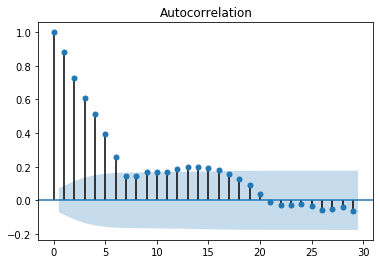

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(apple_prices['weekshifted'][7:])
plt.show()

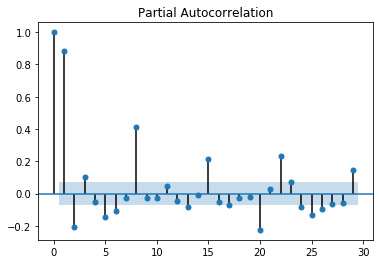

In [67]:
plot_pacf(apple_prices['weekshifted'][7:])
plt.show()

In [75]:
import fbprophet

prdf = apple_prices[['datetime', 'vwap']]
prdf.reset_index()
prdf.columns = ['ds', 'y']
fbp = fbprophet.Prophet()
fbp.fit(prdf)

future = fbp.make_future_dataframe(periods=63)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
forecast = fbp.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
814,2020-07-30,325.846503,297.346100,330.808217,317.859250,333.412249,-10.922776,-10.922776,-10.922776,3.050429,3.050429,3.050429,-13.973205,-13.973205,-13.973205,0.0,0.0,0.0,314.923727
815,2020-07-31,326.155070,297.937792,331.534006,317.887919,333.990040,-11.174151,-11.174151,-11.174151,2.673506,2.673506,2.673506,-13.847658,-13.847658,-13.847658,0.0,0.0,0.0,314.980919
816,2020-08-01,326.463637,287.788662,321.941489,317.913905,334.566207,-20.621095,-20.621095,-20.621095,-6.890501,-6.890501,-6.890501,-13.730593,-13.730593,-13.730593,0.0,0.0,0.0,305.842542
817,2020-08-02,326.772203,288.324678,321.817157,317.943318,335.269106,-20.509977,-20.509977,-20.509977,-6.890501,-6.890501,-6.890501,-13.619476,-13.619476,-13.619476,0.0,0.0,0.0,306.262226
818,2020-08-03,327.080770,298.565818,332.408125,317.862474,336.001093,-11.442875,-11.442875,-11.442875,2.068580,2.068580,2.068580,-13.511455,-13.511455,-13.511455,0.0,0.0,0.0,315.637895


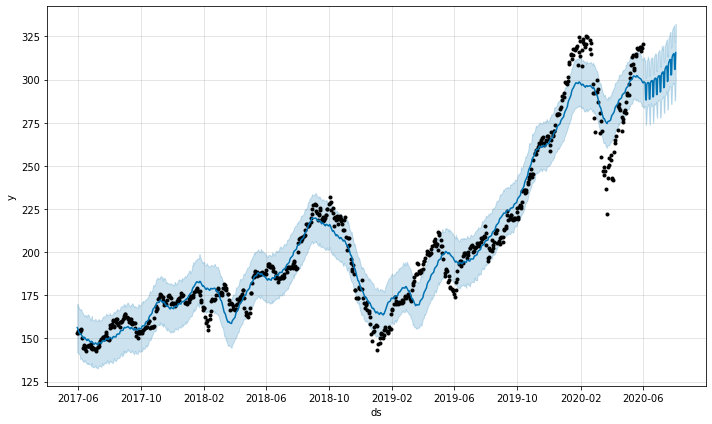

In [77]:
fbp.plot(forecast);

## References

1. https://financialmodelingprep.com/developer/docs/#Company-Financial-Statements